In [1]:
import bs4
import csv
import json
import requests

import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#### Формирование таблицы заболеваемости в регионе

In [2]:
l = requests.get('https://xn--80aesfpebagmfblc0a.xn--p1ai/information/')
e = bs4.BeautifulSoup(l.content)
n = e.find('cv-spread-overview')
a = json.loads(n.attrs[':spread-data'])
information = {x['code']: x['title'] for x in a}
regions = [x[0] for x in information.items()]

In [3]:
data = []
for region in regions:
    r = requests.get(f'https://xn--80aesfpebagmfblc0a.xn--p1ai/covid_data.json?do=region_stats&code={region}')
    assert r.status_code == 200
    data.append(r.json())

In [4]:
covid = {}
for i in range(len(data)):
    for j in range(len(data[i])):
        b = covid.setdefault(list(data[i][j].values())[0], [])
        covid[list(data[i][j].values())[0]] = b + [list(data[i][j].values())[1]]

In [5]:
lists = [x[1] for x in information.items()]

In [6]:
df = pd.DataFrame(covid, index=lists)
df_current = df.T
current = df_current.reset_index()
current_data = current.rename(columns={'index': 'Дата'})
covid_new = current_data.rename_axis('№')
covid_new.head(7)

Дата   Москва  Санкт-Петербург  Московская область  \
№                                                             
0  07.11.2021  1861624           730462              538947   
1  06.11.2021  1856649           727911              535650   
2  05.11.2021  1849769           724773              532565   
3  04.11.2021  1843362           721410              529730   
4  03.11.2021  1837057           718139              526998   
5  02.11.2021  1830230           714870              524254   
6  01.11.2021  1824494           711804              521361   

   Нижегородская область  Свердловская область  Ростовская область  \
№                                                                    
0                 196801                162479              160595   
1                 196011                161742              159948   
2                 195216                161001              159300   
3                 194424                160263              158650   
4                 193625                159533              158001   
5                 192818                158812              157357   
6                 192029                158094              156717   

   Воронежская область  Самарская область  Красноярский край  ...  \
№                                                             ...   
0               159827             144364             136222  ...   
1               159031             142669             135501  ...   
2               158236             141048             134782  ...   
3               157438             139438             134059  ...   
4               156636             137835             133341  ...   
5               155836             136239             132632  ...   
6               155035             134692             131931  ...   

   Чеченская Республика  Республика Ингушетия  Республика Марий Эл  \
№                                                                    
0                 26110                 24228                23405   
1                 25994                 24147                23278   
2                 25880                 24065                23151   
3                 25765                 23986                23025   
4                 25648                 23905                22899   
5                 25532                 23822                22771   
6                 25414                 23742                22644   

   Республика Алтай  Республика Адыгея  Камчатский край  Магаданская область  \
№                                                                              
0             23287              22117            21317                11958   
1             23244              22035            21270                11926   
2             23192              21956            21224                11895   
3             23134              21877            21178                11859   
4             23078              21797            21133                11820   
5             23030              21719            21088                11785   
6             22991              21640            21044                11761   

   Еврейская автономная область  Ненецкий автономный округ  \
№                                                            
0                          9570                       2876   
1                          9526                       2862   
2                          9479                       2846   
3                          9431                       2829   
4                          9385                       2813   
5                          9338                       2797   
6                          9293                       2781   

   Чукотский автономный округ  
№                              
0                        2498  
1                        2480  
2                        2462  
3                        2443  
4                        2425  
5                        2407  
6                    

In [8]:
#подсчет заболевших за неделю
oy = covid_new.loc[0: 6]

values = []
for i in lists:
    values.append(oy[i].astype(int).max() - oy[i].astype(int).min())

In [9]:
#подсчет заболевших за сутки
oz = covid_new.loc[0: 1]

prob = []
for i in lists:
    prob.append(oz[i].astype(int).max() - oz[i].astype(int).min())

In [10]:
week = pd.DataFrame({'Субъект России': lists, 'Заболевшие за неделю': values, 'Заболевшие за сутки': prob})

In [11]:
#замена названий регионов для последующего соединения таблиц
week['Субъект России'] = week['Субъект России']. \
        apply(lambda x: x.replace('Республика Северная Осетия — Алания', 'Респ. Сев. Осетия-Алания').strip())
week['Субъект России'] = week['Субъект России']. \
        apply(lambda x: x.replace('Республика Чувашия', 'Чувашская Республика').strip())
week['Субъект России'] = week['Субъект России']. \
        apply(lambda x: x.replace('Кабардино-Балкарская Республика', 'Кабардино-Балкарская Респ.').strip())
week['Субъект России'] = week['Субъект России']. \
        apply(lambda x: x.replace('Карачаево-Черкесская Республика', 'Карачаево-Черкесская Респ.').strip())
week['Субъект России'] = week['Субъект России']. \
        apply(lambda x: x.replace('Еврейская автономная область', 'Еврейская авт. область').strip())
week['Субъект России'] = week['Субъект России']. \
        apply(lambda x: x.replace('Ханты-Мансийский АО', 'Ханты-Мансийский ао-Югра').strip())
week['Субъект России'] = week['Субъект России']. \
        apply(lambda x: x.replace('Ямало-Ненецкий автономный округ', 'Ямало-Ненецкий ао').strip())

In [12]:
week = week.sort_values('Субъект России')
week.reset_index(inplace=True)
del week['index']
week.head()

Субъект России  Заболевшие за неделю  Заболевшие за сутки
0         Алтайский край                  2961                  510
1       Амурская область                  1124                  203
2  Архангельская область                  2791                  469
3   Астраханская область                  1543                  260
4   Белгородская область                  2115                  340

#### Формирование таблицы о численносте населения в регионе

In [13]:
url = 'http://www.statdata.ru/largest_regions_russia'

header = {
          'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_1_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'
          }
re = requests.get(url, headers=header)
assert re.status_code == 200
soup = bs4.BeautifulSoup(re.text, 'lxml')
tables = soup.find_all('table')[0]

In [14]:
f = open('population.csv', 'w', encoding='utf-8')
w = csv.writer(f)

for x in tables.find_all('tr')[1:]:
    w.writerow([y.text for y in x.find_all('td')])
f.close()

In [15]:
pop = pd.read_csv('population.csv', encoding='utf-8', names=['Субъект России', 'Население 2021, чел', 'Городское',
                                                            'Сельское', 'Население 2020', 'Городское.1', 'Сельское.1'])

In [16]:
pop.head(3)

Субъект России Население 2021, чел    Городское    Сельское  \
0  Российская Федеpация         146 171 015  109 254 249  36 916 766   
1        Центральный ФО          39 250 960   32 346 663   6 904 297   
2  Белгородская область           1 541 259    1 041 310     499 949   

  Население 2020  Городское.1  Сельское.1  
0    146 459 803  109 408 360  37 051 443  
1     39 342 258   32 400 443   6 941 815  
2      1 545 205    1 043 414     501 791

In [17]:
population = []
for x in tables.find_all('tr')[1:]:
    a, b, c, d, e, f, g = [y.text for y in x.find_all('td')]
    a = a.replace('г.', '').lstrip()
    if a[len(a)-4:] not in {'й ФО', 'з АО', ' НАО', 'з ао'} and a != 'Российская Федеpация':
        population.append((a, b))
                          
population.sort(key=lambda x: x[0])
                          
f = open('population.csv', 'w', encoding='utf-8') 
w = csv.writer(f)
for p in population:
    w.writerow(p)
f.close()

pop_res = pd.read_csv('population.csv', encoding='utf-8', names=['Субъект России', 'Население, чел'])

pop_res['Субъект России'] = pop_res['Субъект России']. \
        apply(lambda x: x.replace('Чукотский авт. округ', 'Чукотский автономный округ').strip() if 'Чукотский авт. округ' in x else x)

In [18]:
pop_res.head(3)

Субъект России Население, чел
0         Алтайский край      2 296 353
1       Амурская область        781 846
2  Архангельская область      1 127 051

#### Формирование таблицы о значениях площадей регионов

In [19]:
url_square = 'http://www.statdata.ru/ploshchad/rossii'

header = {
           'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_1_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'
           }
re_square = requests.get(url_square, headers=header)
assert re_square.status_code == 200 
soup_square = bs4.BeautifulSoup(re_square.text, 'lxml')
table = soup_square.find_all('table')

In [20]:
f = open('square.csv', 'w', encoding='utf-8')
w = csv.writer(f)

for x in table[0].find_all('tr'):
    w.writerow([y.text for y in x.find_all('td')])
f.close()

In [21]:
squ = pd.read_csv('square.csv', encoding='utf-8', header=0)
squ.head(3)

№            Субъект России Площадь,км² % от РФ Федеральный округ
0  NaN                    Россия  17 125 191  100.00               NaN
1  1.0  Республика Саха (Якутия)   3 083 523   18,01   Дальневосточный
2  2.0         Красноярский край   2 366 797   13,82         Сибирский

In [22]:
square = []
for x in table[0].find_all('tr'):
    a, b, c, d, e = [y.text for y in x.find_all('td')]
    if b[len(b)-7:] not in {'без НАО', ' без АО'} and b != 'Россия':
        square.append((b, c))

f = open('square.csv', 'w', encoding='utf-8')
w = csv.writer(f)
for s in square:
    w.writerow(s)
f.close()

squ = pd.read_csv('square.csv', encoding='utf-8')

#приведем в соответствие название регионов с предыдущей таблицей pop_res
squ['Субъект России'] = squ['Субъект России']. \
        apply(lambda x: x.replace('Бурятия', 'Республика Бурятия').strip() if 'Бурятия' in x else x)
squ['Субъект России'] = squ['Субъект России']. \
        apply(lambda x: x.replace('обл. с НАО', 'область').strip() if 'обл. с НАО' in x else x)
squ['Субъект России'] = squ['Субъект России']. \
        apply(lambda x: x.replace('Кабардино-Балкария', 'Кабардино-Балкарская Респ.').strip() if 'Кабардино-Балкария' in x else x)
squ['Субъект России'] = squ['Субъект России']. \
        apply(lambda x: x.replace('Карачаево-Черкесия', 'Карачаево-Черкесская Респ.').strip() if 'Карачаево-Черкесия' in x else x)
squ['Субъект России'] = squ['Субъект России']. \
        apply(lambda x: x.replace('обл. с АО', 'область').strip() if 'обл. с АО' in x else x)
squ['Субъект России'] = squ['Субъект России']. \
        apply(lambda x: x.replace('Респ. Сев. Осетия — Алания', 'Респ. Сев. Осетия-Алания').strip() if 'Респ. Сев. Осетия — Алания' in x else x)

squ_res = squ.sort_values('Субъект России')

In [23]:
squ_res.head(3)

Субъект России Площадь,км²
21         Алтайский край     167 996
13       Амурская область     361 908
7   Архангельская область     589 913

#### Объединение таблиц, формирование новых столбцов

In [24]:
data = pd.merge(pop_res, squ_res, how='outer', on='Субъект России')

data['Население, чел'] = data['Население, чел'].apply(lambda x: x.replace(' ', ''))
data['Площадь,км²'] = data['Площадь,км²'].apply(lambda x: x.replace(' ', ''))
data['Население, чел'] = data['Население, чел'].astype(int)
data['Площадь,км²'] = data['Площадь,км²'].astype(int)
data['Плотность населения, чел/км²'] = round(data['Население, чел'] / data['Площадь,км²'])

In [25]:
res_m = pd.merge(data, week, how='left', on='Субъект России')

res_m['Заболевшие за неделю, %'] = (res_m['Заболевшие за неделю'] / res_m['Население, чел']) * 100
res_m['Средняя вероятность, %/сутки'] = (res_m['Заболевшие за сутки'] / res_m['Население, чел']) * 100

In [26]:
res_m.head()

Субъект России  Население, чел  Площадь,км²  \
0         Алтайский край         2296353       167996   
1       Амурская область          781846       361908   
2  Архангельская область         1127051       589913   
3   Астраханская область          997778        49024   
4   Белгородская область         1541259        27134   

   Плотность населения, чел/км²  Заболевшие за неделю  Заболевшие за сутки  \
0                          14.0                  2961                  510   
1                           2.0                  1124                  203   
2                           2.0                  2791                  469   
3                          20.0                  1543                  260   
4                          57.0                  2115                  340   

   Заболевшие за неделю, %  Средняя вероятность, %/сутки  
0                 0.128944                      0.022209  
1                 0.143762                      0.025964  
2                 0.247637                      0.041613  
3                 0.154644                      0.026058  
4                 0.137225                      0.022060

In [27]:
res_m.to_csv('statcovid_8nov21', encoding='utf-8', index=False)

#### Построение графиков

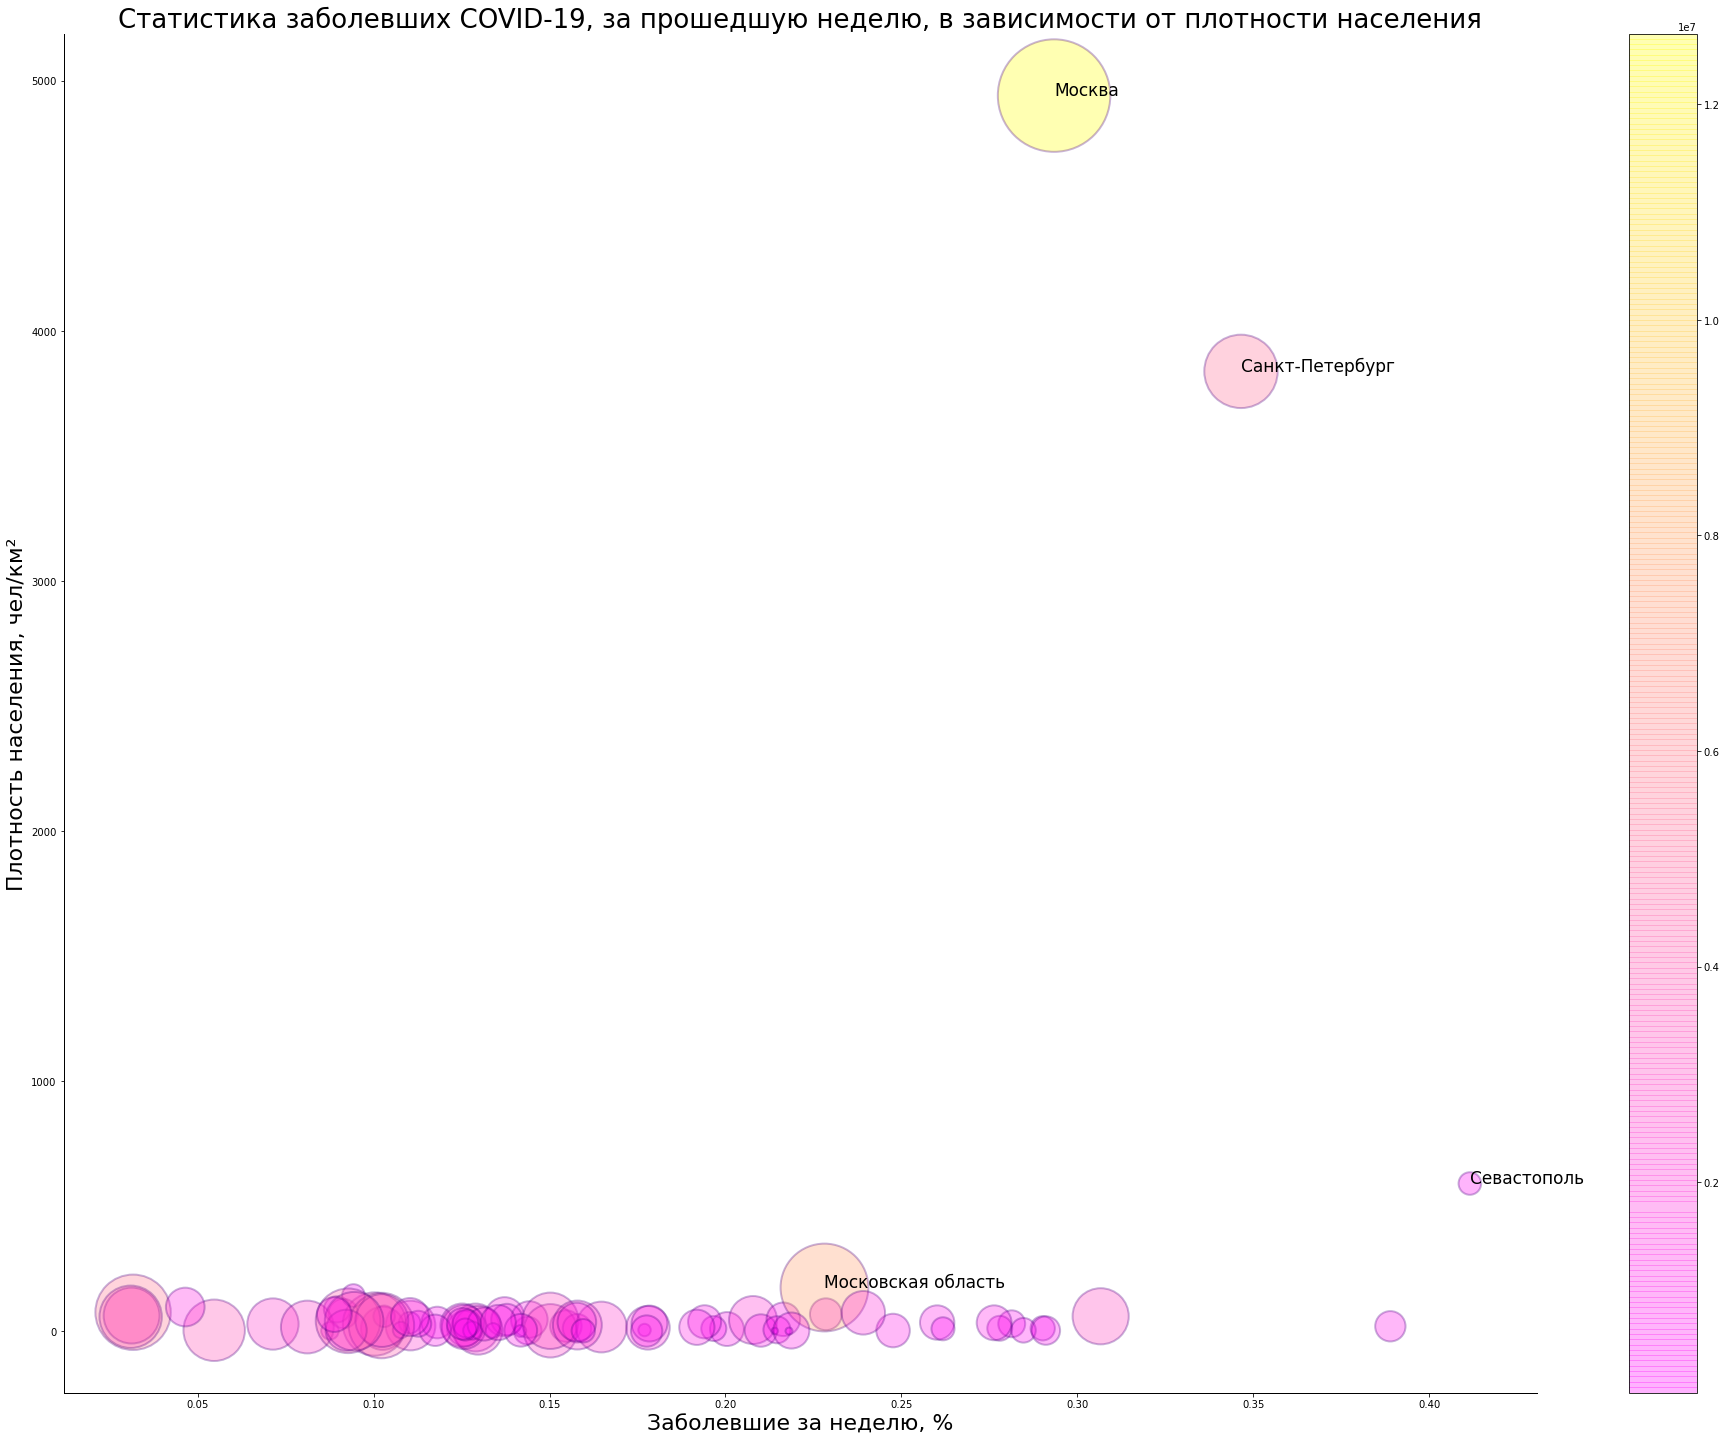

In [28]:
fig, ax = plt.subplots(figsize=(33, 25))

sche = ax.scatter(res_m['Заболевшие за неделю, %'], res_m['Плотность населения, чел/км²'],
        s=res_m['Население, чел']/1000, alpha=0.3, c=res_m['Население, чел'], cmap='spring', 
        edgecolors='indigo', linewidth=2)

for s in ['right', 'top']:
    ax.spines[s].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

for s in ['left', 'bottom']:
    ax.spines[s].set_linewidth(1)

ax.set_xlabel('Заболевшие за неделю, %', fontsize=22)
ax.set_ylabel('Плотность населения, чел/км²', fontsize=22)
ax.set_title('Статистика заболевших COVID-19, за прошедшую неделю, в зависимости от плотности населения',
            fontsize=26)

ax.annotate('Москва', (res_m['Заболевшие за неделю, %'][29], res_m['Плотность населения, чел/км²'][29]),
                fontsize=17)
ax.annotate('Санкт-Петербург', (res_m['Заболевшие за неделю, %'][63], res_m['Плотность населения, чел/км²'][63]),
                fontsize=17)
ax.annotate('Севастополь', (res_m['Заболевшие за неделю, %'][67], res_m['Плотность населения, чел/км²'][67]),
                fontsize=17)
ax.annotate('Московская область', (res_m['Заболевшие за неделю, %'][30], res_m['Плотность населения, чел/км²'][30]),
                fontsize=17)


plt.colorbar(sche)
plt.show()

Для детального анализа увеличим график

In [29]:
res_not_blowout = res_m[(res_m['Заболевшие за неделю, %'] < 0.4) & (res_m['Плотность населения, чел/км²'] < 500)]
res_not_blowout.index = [i for i in range(82)]

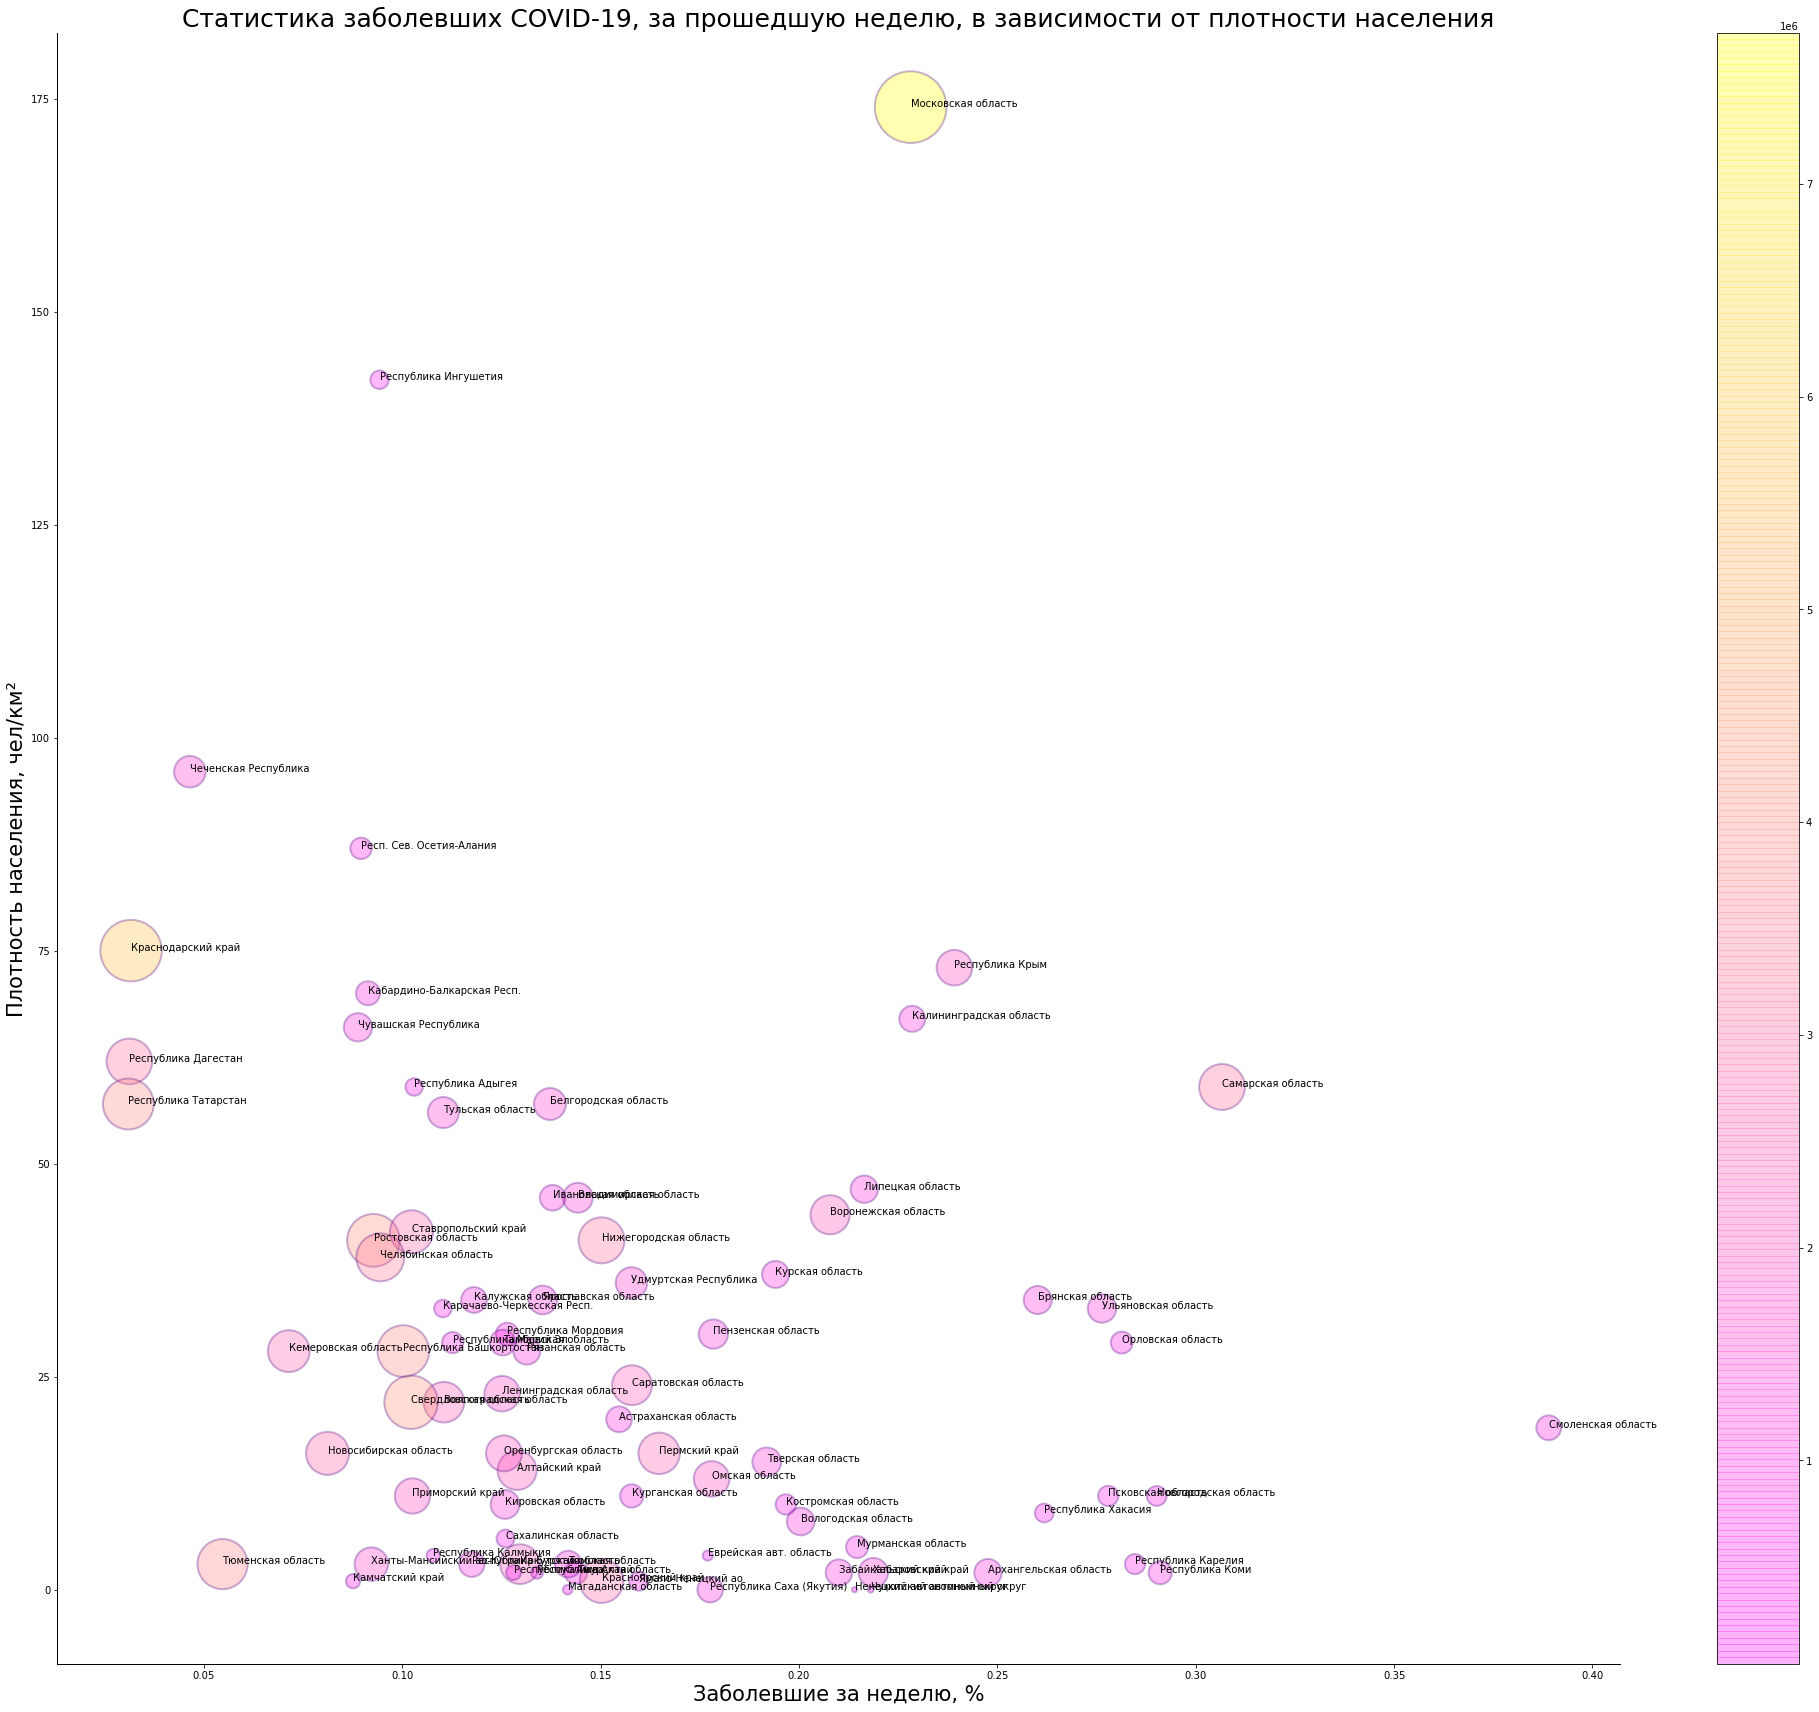

In [30]:
fig, ax = plt.subplots(figsize=(35, 30))

sche = ax.scatter(res_not_blowout['Заболевшие за неделю, %'], res_not_blowout['Плотность населения, чел/км²'],
        s=res_not_blowout['Население, чел']/1500, alpha=0.3, c=res_not_blowout['Население, чел'], cmap='spring', 
        edgecolors='indigo', linewidth=2)

for s in ['right', 'top']:
    ax.spines[s].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

for s in ['left', 'bottom']:
    ax.spines[s].set_linewidth(1)

ax.set_xlabel('Заболевшие за неделю, %', fontsize=21)
ax.set_ylabel('Плотность населения, чел/км²', fontsize=21)
ax.set_title('Статистика заболевших COVID-19, за прошедшую неделю, в зависимости от плотности населения',
            fontsize=25)

for i, region in enumerate(res_not_blowout['Субъект России']):
    ax.annotate(region, (res_not_blowout['Заболевшие за неделю, %'][i], res_not_blowout['Плотность населения, чел/км²'][i]),
                fontsize=10)

plt.colorbar(sche)
plt.show()

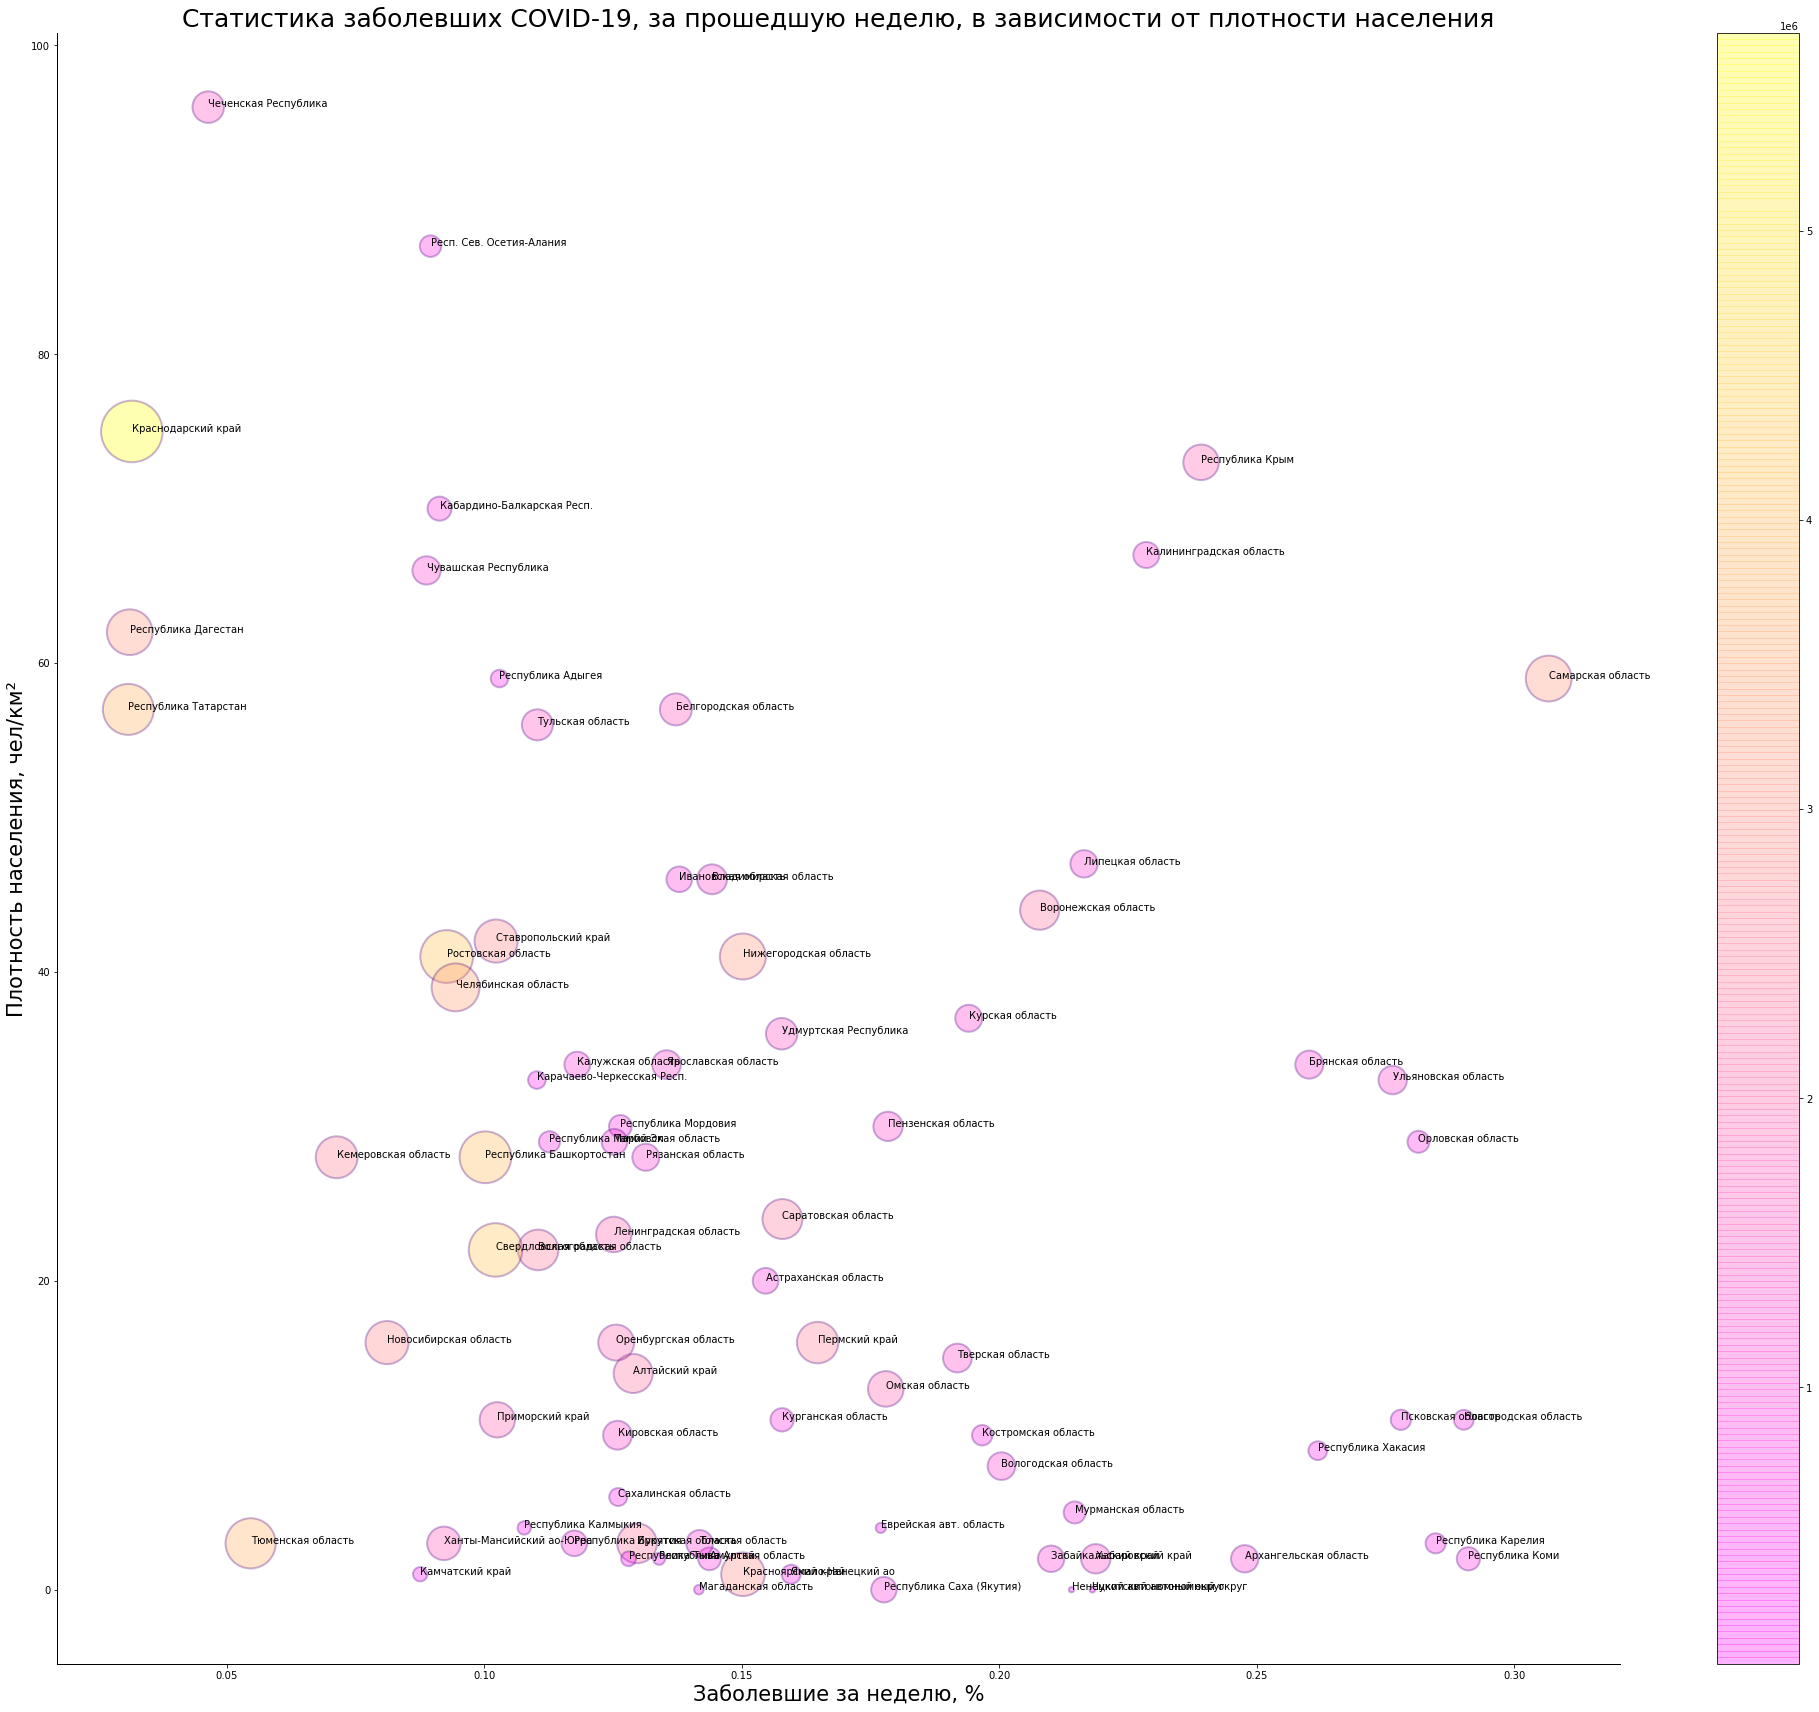

In [34]:
res_not_blowout = res_m[(res_m['Заболевшие за неделю, %'] < 0.35) & (res_m['Плотность населения, чел/км²'] < 100)]
res_not_blowout.index = [i for i in range(79)]



fig, ax = plt.subplots(figsize=(35, 30))

sche = ax.scatter(res_not_blowout['Заболевшие за неделю, %'], res_not_blowout['Плотность населения, чел/км²'],
        s=res_not_blowout['Население, чел']/1500, alpha=0.3, c=res_not_blowout['Население, чел'], cmap='spring', 
        edgecolors='indigo', linewidth=2)

for s in ['right', 'top']:
    ax.spines[s].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

for s in ['left', 'bottom']:
    ax.spines[s].set_linewidth(1)

ax.set_xlabel('Заболевшие за неделю, %', fontsize=21)
ax.set_ylabel('Плотность населения, чел/км²', fontsize=21)
ax.set_title('Статистика заболевших COVID-19, за прошедшую неделю, в зависимости от плотности населения',
            fontsize=25)

for i, region in enumerate(res_not_blowout['Субъект России']):
    ax.annotate(region, (res_not_blowout['Заболевшие за неделю, %'][i], res_not_blowout['Плотность населения, чел/км²'][i]),
                fontsize=10)

plt.colorbar(sche)

plt.savefig('COVID-19.png', dpi=192)
plt.show()

Следующая диаграмма демонстрирует в каком регионе вероятнее всего заболеть. Так же визуализация анализа вероятности заболеваемости COVID-19 в РФ в [Tableau public.](https://public.tableau.com/app/profile/elena7004/viz/RussiastatisticsCOVID-19/COVID-19?publish=yes)

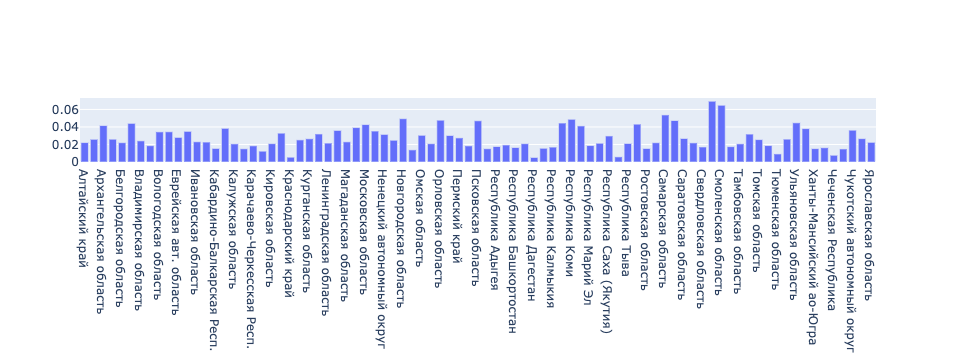

In [35]:
pic = go.Bar(x=res_m['Субъект России'], y=res_m['Средняя вероятность, %/сутки'])
fig = go.Figure(data=[pic])
fig.show()